In [1]:
# Sales 
#          Actual_Pred  Adjst_pred  Actual    Error_Inf  Err_Act
# Jan          120        120          80      -40        -40
# Feb          150        110         100      -10        -50
# Mar          180        170         135      ...        ...

#                                   Model Parameter
# SES - Level               -         alpha  - smoothing_level
# DES - Level + Trend       -         beta   - smoothing_trend
# DES using both alpha and beta
# TES - Level + Trend + Seasonality - gamma  - smoothing_season
# TES using all the parameters - alpha, beta and gamma
# TES - Holt's Winter Smoothing 

### Exponential Smoothing

1) Exponential Smoothing is an elementary technique used for forecasting where the forecast is made through the exponentially weighted average of prior observations. <br>
2) While the largest weight is provided to present observations, less weight are projected to immediately preceding observations, much less weight to the observation prior to that, and so on such that weighted values reflect exponential decay in terms of influence of past data.<br>
3) It is of 3 types:


### a) SES (Single Exponential Smoothing)
1) Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

2) It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

3) Alpha  parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

4) A value close to 1 indicates fast learning (that is, only the most recent values influence the forecasts), whereas a value close to 0 indicates slow learning (past observations have a large influence on forecasts

#### Equation
$  {F}_{t+1} = α{Y}_{t} + (1−α) {F}_{t}    $

### Double Exponential Smoothing
1) Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the time series.<br>
2) In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta(b).<br>

#### Equation
Intercept or Level equation<br>
$ {L}_{t} =  α{Y}_{t} + (1−α){F}_{t}  $

Trend equation <br>
$ {T}_{t} =  β ({L}_{t} − {L}_{t−1}) + (1−β){T}_{t-1}  $

where 0 <α < 1 and 0 < β < 1.

Forecast Equation<br>
$ {F}_{t+1} = {L}_{t} + {T}_{t} $

### Triple Exponential Smoothing (Holts-Winter Exponential Smoothing)

1) Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

2) This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

3) In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

where 0 <α < 1,  0 < β < 1 and 0 < γ < 1<br>
The raw data sequence of observations is represented by $ {x}_{t} $ beginning at time t=0.

<img src="triple_smoothing.png" align="left">



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv('electric_prod.csv',parse_dates=True,index_col=[0])
df.head()

,Value
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [6]:
df.tail(20)

,Value
Date,
2016-06-01,104.0375
2016-07-01,114.5397
2016-08-01,115.5159
2016-09-01,102.7637
2016-10-01,91.4867
2016-11-01,92.8900
2016-12-01,112.7694
2017-01-01,114.8505
2017-02-01,99.4901


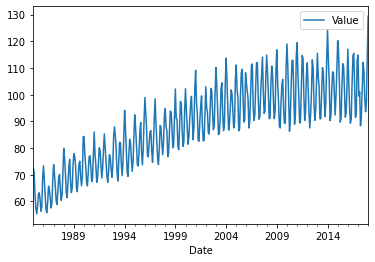

In [7]:
df.plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
def adf_test(data):
    res = adfuller(data)
#     print('res',res)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [10]:
adf_test(df)

ADF-Test_Stat -2.2569903500472432
p-val 0.18621469116586814
Ho accepted - Data is non-stationary


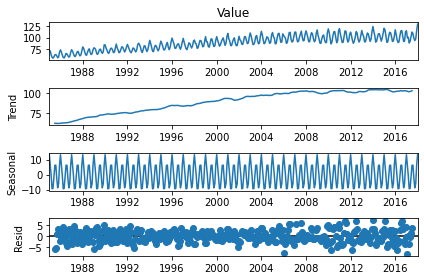

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='additive')
result.plot()
plt.show()

ADF-Test_Stat -3.1453604281077183
p-val 0.023373401032985863
H1 accepted - Data is stationary


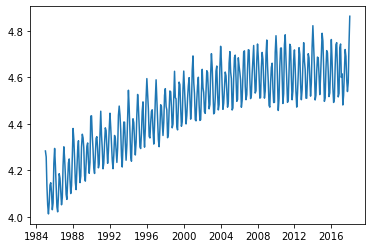

In [12]:
df_log = np.log(df)
adf_test(df_log)
plt.plot(df_log)
plt.show()

In [13]:
df1 = df.copy()
df1.head()

,Value
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [14]:
df1['Log'] = np.log(df1['Value'])
df1.head()
# df1['Actual'] = np.exp(df1['Log'])
# df1.head()

,Value,Log
Date,,
1985-01-01,72.5052,4.283658
1985-02-01,70.6720,4.258049
1985-03-01,62.4502,4.134369
1985-04-01,57.4714,4.051287
1985-05-01,55.3151,4.013046


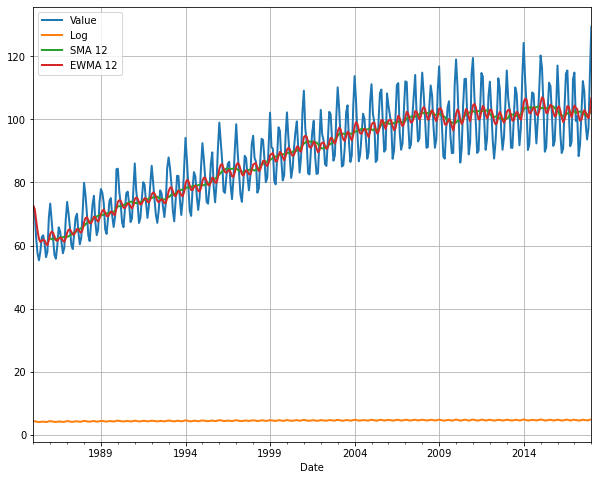

In [15]:
df1['SMA 12'] = df1['Value'].rolling(window=12).mean()
df1['EWMA 12'] = df1['Value'].ewm(span=12).mean()
df1.plot(figsize=(10,8), lw=2, grid=True, legend=True);
plt.show()

#### Single Exponential Smoothing

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
df1.head(3)

,Value,Log,SMA 12,EWMA 12
Date,,,,
1985-01-01,72.5052,4.283658,NaN,72.505200
1985-02-01,70.6720,4.258049,NaN,71.512217
1985-03-01,62.4502,4.134369,NaN,67.975309


In [18]:
df1.columns

Index(['Value', 'Log', 'SMA 12', 'EWMA 12'], dtype='object')

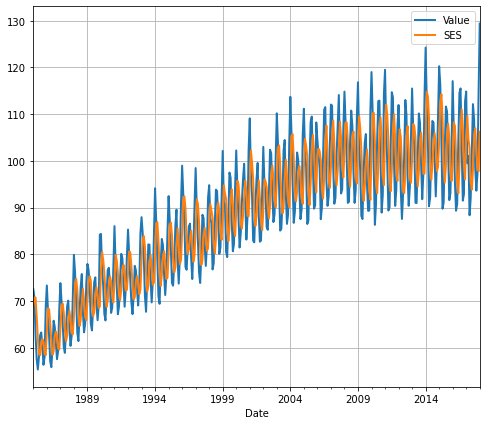

In [19]:
# alpha = 0.3
alpha = 0.5
ses = ExponentialSmoothing(df1['Value'])
ses_model = ses.fit(smoothing_level=alpha)
df1['SES'] = ses_model.fittedvalues

df1[['Value', 'SES']].plot(figsize=(8,7), lw=2, grid=True, legend=True)
plt.show()

In [20]:
df.tail(3)

,Value
Date,
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [21]:
# Forecast next 10 values
ses_model.forecast(10)

2018-02-01    117.826079
2018-03-01    117.826079
2018-04-01    117.826079
2018-05-01    117.826079
2018-06-01    117.826079
2018-07-01    117.826079
2018-08-01    117.826079
2018-09-01    117.826079
2018-10-01    117.826079
2018-11-01    117.826079
Freq: MS, dtype: float64

#### Double Exponential Smoothing

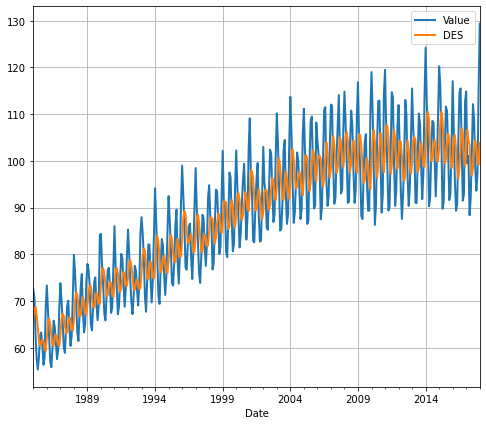

In [22]:
# alpha = smpoothing_level
# beta = smoothing_trend
alpha = 0.3
beta = 0.2
des = ExponentialSmoothing(df1['Value'])
des_model = des.fit(smoothing_level=alpha,smoothing_trend=beta)
df1['DES'] = des_model.fittedvalues

df1[['Value', 'DES']].plot(figsize=(8,7), lw=2, grid=True, legend=True)
plt.show()

#### Triple Exponential Smoothing (Holt Winter Smoothing Method)

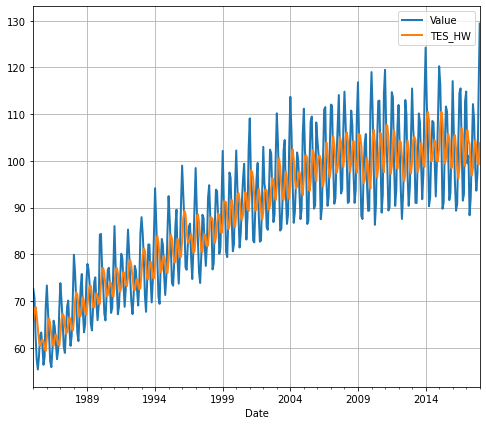

In [23]:
# alpha = smpoothing_level
# beta = smoothing_trend
# gamma = smoothing_seasonal
alpha = 0.3
beta = 0.4
gamma = 0.1
tes = ExponentialSmoothing(df1['Value'])
tes_model = tes.fit(smoothing_level=alpha,smoothing_trend=beta,
                    smoothing_seasonal=gamma)
df1['TES_HW'] = tes_model.fittedvalues

df1[['Value', 'TES_HW']].plot(figsize=(8,7), lw=2, grid=True, legend=True)
plt.show()

In [25]:
df1.head()

,Value,Log,SMA 12,EWMA 12,SES,DES,TES_HW
Date,,,,,,,
1985-01-01,72.5052,4.283658,NaN,72.505200,68.926574,65.912780,65.912780
1985-02-01,70.6720,4.258049,NaN,71.512217,70.715887,67.890506,67.890506
1985-03-01,62.4502,4.134369,NaN,67.975309,70.693943,68.724954,68.724954
1985-04-01,57.4714,4.051287,NaN,64.659636,66.572072,66.842528,66.842528
1985-05-01,55.3151,4.013046,NaN,62.120759,62.021736,64.031190,64.031190


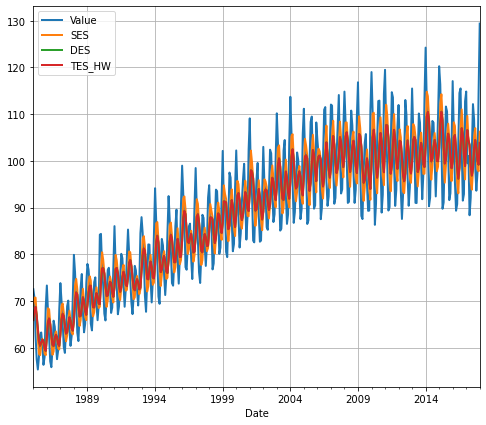

In [26]:
df1[['Value','SES','DES','TES_HW']].plot(figsize=(8,7), lw=2, grid=True, legend=True)
plt.show()

### ARIMA

In [27]:
import statsmodels.tsa.arima.model as z
print(dir(z))

['ARIMA', 'ARIMAResults', 'ARIMAResultsWrapper', 'Appender', 'MEMORY_CONSERVE', 'SARIMAXSpecification', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_is_using_pandas', 'burg', 'diff', 'estimate_gls', 'hannan_rissanen', 'innovations', 'innovations_mle', 'np', 'sarimax', 'warnings', 'wrap', 'yule_walker']


In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
# (p,d,q)
m1 = ARIMA(df1['Log'],order=(1,0,0))
m1_ar = m1.fit()
print(m1_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  397
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 428.823
Date:                Mon, 01 Aug 2022   AIC                           -851.647
Time:                        22:17:21   BIC                           -839.695
Sample:                    01-01-1985   HQIC                          -846.912
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4754      0.039    114.033      0.000       4.398       4.552
ar.L1          0.8934      0.026     34.903      0.000       0.843       0.944
sigma2         0.0067      0.001      9.571      0.0

In [30]:
df1[['Value','Log']].tail()

,Value,Log
Date,,
2017-09-01,98.6154,4.591227
2017-10-01,93.6137,4.539177
2017-11-01,97.3359,4.578168
2017-12-01,114.7212,4.742505
2018-01-01,129.4048,4.862945


In [31]:
fcast_m1 = m1_ar.forecast(10)
fcast_m1

2018-02-01    4.821631
2018-03-01    4.784721
2018-04-01    4.751746
2018-05-01    4.722286
2018-06-01    4.695967
2018-07-01    4.672454
2018-08-01    4.651447
2018-09-01    4.632680
2018-10-01    4.615913
2018-11-01    4.600934
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
fcast_m1_exp = np.exp(fcast_m1)
fcast_m1_exp

2018-02-01    124.167456
2018-03-01    119.667985
2018-04-01    115.786266
2018-05-01    112.424981
2018-06-01    109.504645
2018-07-01    106.959853
2018-08-01    104.736412
2018-09-01    102.789125
2018-10-01    101.080071
2018-11-01     99.577262
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
df1.shape
print(df1.index.min())
print(df1.index.max())

1985-01-01 00:00:00
2018-01-01 00:00:00


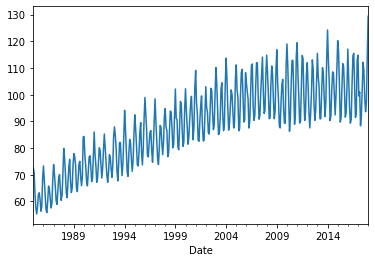

In [34]:
df1['Value'].plot()
plt.show()

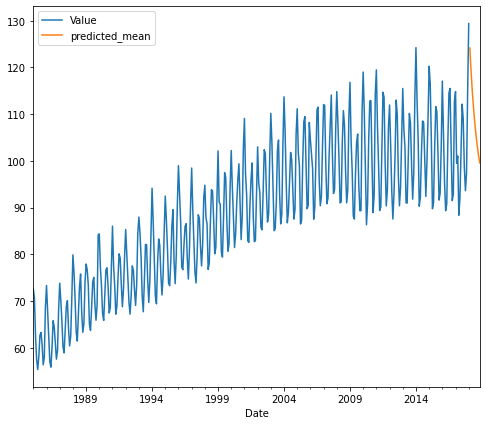

In [35]:
df1['Value'].plot(figsize=(8,7),legend=True)
fcast_m1_exp.plot(figsize=(8,7),legend=True)
plt.show()